<a href="https://colab.research.google.com/github/jade-mcalister/Breast-Cancer-Dataset/blob/development/Breast_Cancer_FFN_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np

data = load_breast_cancer()
list(data.target_names)
['malignant', 'benign']

# Read data
X,y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 1111)

class LogisticRegression:

  # Constructor
  def __init__(self, learning_rate=0.05):
    self.learning_rate=learning_rate
    # Initializing weights and bias
    self.weights = None
    self.bias=0

  # Sigmoid function
  def sigmoid(self, z):
    return 1/(1+np.exp(-z))

  def fit(self, X, y):
    n_samples, n_features=X.shape

    if self.weights is None:
      self.weights=np.zeros(n_features, dtype=np.float128)

    # Gradient descent
    linear_combination = np.dot(X, self.weights) + self.bias #y=wx+b
    y_predicted = self.sigmoid(linear_combination) #implements sigmoid function

    # Gradient derivatives for weights and bias
    dw=(1/n_samples)*np.dot(X.T, (y_predicted -y))
    db=(1/n_samples)*np.sum(y_predicted-y)

    # Update weights
    self.weights-=self.learning_rate*dw
    self.bias-=self.learning_rate*db

  def predict(self, X):
    linear_combination=np.dot(X, self.weights)+self.bias #y=wx+b
    y_predicted = self.sigmoid(linear_combination)

    # Rounds to zero or 1
    y_predicted_label=[]
    for i in range(len(y_predicted)):
      if y_predicted[i] >= 0.5:
        y_predicted_label.append(1)
      else:
        y_predicted_label.append(0)

    return y_predicted_label

def accuracy(y_actual, y_predicted):
  accuracy=np.sum(y_actual==y_predicted)/ len(y_actual)
  return accuracy

acc=[]
itr=[]

regressor = LogisticRegression(learning_rate=0.05)

for i in range(10000):
  regressor.fit(X_train, y_train)
  itr.append(i)

  predictions=regressor.predict(X_test)
  acc.append(accuracy(y_test, predictions))

class FFN:
  def __init__(self, learning_rate=0.05):
    self.learning_rate=learning_rate
    self.bias={}
    self.weights={}

  #initialize layers
  input_neurons=X_train.shape[1]
  hidden_neurons=4
  output_neuron=1

  #sigmoid function
  def sigmoid(z):
    return 1/(1+np.exp(-z))

  #initialize random weights and biases
  learning_rate=0.05
  weights_input_hidden = np.random.uniform(size=(input_neurons, hidden_neurons))
  biases_input_hidden = np.random.uniform(size=(1, hidden_neurons))

  weights_hidden_output = np.random.uniform(size=(hidden_neurons, output_neuron))
  biases_hidden_output = np.random.uniform(size=(1, output_neuron))

  #forward propagation
  def forward_pass(self, weights_input_hidden, biases_input_hidden, weights_hidden_output, biases_hidden_output, n_samples):
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + biases_input_hidden #y=wx+b
    hidden_layer_output = self.sigmoid(hidden_layer_input) #implement sigmoid function
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_hidden_output #y=wx+b
    output = self.sigmoid(output_layer_input) #implement sigmoid function

  #back propagation

    #gradient descent
    linear_combination = np.dot(X, self.weights) + self.bias #y=wx+b
    y_predicted = self.sigmoid(linear_combination) #implements sigmoid function

    def gradients(output):
      return output*(1-output)

    #error calculation
    errors=[]
    dw1 = gradients(hidden_layer_input)
    dw2 = gradients(hidden_layer_output)
    dw3 = gradients(output_layer_input)
    dw4 = gradients(output)
    errors.append((output - y_predicted) * dw1)
    errors.append((output - y_predicted) * dw2)
    errors.append((output - y_predicted) * dw3)
    errors.append((output - y_predicted) * dw4)

    #update weights
    self.weights-=self.learning_rate*self.dw
    self.bias-=self.learning_rate*self.db

  regressor = LogisticRegression(learning_rate=0.05)
  hidden_layer_input = np.dot(X_test, weights_input_hidden) + biases_input_hidden
  hidden_layer_output = sigmoid(hidden_layer_input)

  output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_hidden_output
  output = sigmoid(output_layer_input)

  # Round output to 0 or 1
  predictions = (output > 0.5).astype(int)

  # Accuracy
  accuracy = np.mean(predictions == y_test.reshape(-1, 1))
  print("FFN Accuracy:", accuracy)
  loss=[]
  for i in range(10000):
    regressor.fit(X_train, y_train)
    predictions=regressor.predict(X_test)


<ipython-input-4-1187db264ba1>:31: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


FFN Accuracy: 0.6081871345029239


In [5]:
print("Logistic Regression Accuracy: ", acc[len(acc)-1])

Logistic Regression Accuracy:  0.9064327485380117


Text(0, 0.5, 'Accuracy')

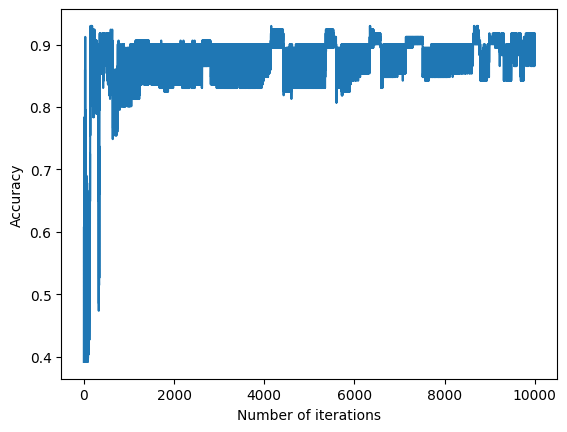

In [6]:
#plt.scatter(itr,acc,color="r")
plt.plot(itr,acc)
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")